PBDE Simulation (newest code by Susan) analysis :D

In [28]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os

In [29]:
path_susan = '/home/sallen/MEOPAR/ANALYSIS/analysis-vicente/Ocean_Parcels/SHARED'
files = ['Full_Marine_Sink_for_1-1-2021_run_365_days.zarr',
         'Full_Marine_Sink_for_31-1-2021_run_365_days.zarr',
        'Full_Marine_Sink_for_2-3-2021_run_365_days.zarr',
        'Full_Marine_Sink_for_1-4-2021_run_365_days.zarr',
        'Full_Marine_Sink_for_1-5-2021_run_365_days.zarr',
        'Full_Marine_Sink_for_31-5-2021_run_365_days.zarr',
        'Full_Marine_Sink_for_30-6-2021_run_365_days.zarr',
        'Full_Marine_Sink_for_30-7-2021_run_365_days.zarr',
        'Full_Marine_Sink_for_3-9-2021_run_365_days.zarr',
        'Full_Marine_Sink_for_3-10-2021_run_365_days.zarr',
        'Full_Marine_Sink_for_2-11-2021_run_365_days.zarr',
        'Full_Marine_Sink_for_2-12-2021_run_365_days.zarr']
#

susan_runs = []
for name_file in files:
    susan_runs.append(os.path.join(path_susan, name_file))

In [30]:
data = xr.open_dataset(susan_runs[1])

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Text(0, 0.5, 'Status')

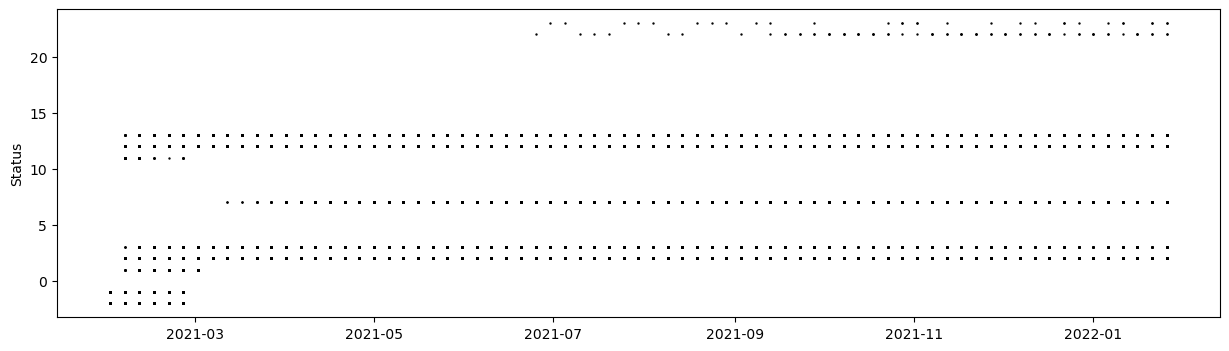

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.scatter(data.time, data.status, s = .5, c = 'k')
ax.set_ylabel('Status')

Proportions of total amount of particles along the simulation

In [32]:
#
colloidal_water = []
marine_water = [] 
sewage_water = []
initial = []
colloidal_sediment = []
marine_sediment = []
sewage_sediment = []
colloidal_buried = []
marine_buried = []
sewage_buried = []
total = []
#
for i in range(len(data.obs)):
    len_initial = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] < 0.))[0])
    len_1 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 1.))[0])
    len_2 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 2.))[0])
    len_3 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 3.))[0])
    len_11 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 11.))[0])
    len_12 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 12.))[0])
    len_13 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 13.))[0])
    #
    len_T = np.count_nonzero(~np.isnan(data.status[:, i]))
    #
    colloidal_water.append(len_2)
    marine_water.append(len_3) 
    sewage_water.append(len_1)
    initial.append(len_initial)
    colloidal_sediment.append(len_12)
    marine_sediment.append(len_13)
    sewage_sediment.append(len_11)
    total.append(len_T)
#    
proportion_initial = np.array(initial)/np.array(total) *100
#
proportion_colloidal_water = np.array(colloidal_water)/np.array(total) *100
proportion_marine_water = np.array(marine_water)/np.array(total) *100
proportion_sewage_water = np.array(sewage_water)/np.array(total) *100
#
proportion_colloidal_sediment = np.array(colloidal_sediment)/np.array(total) *100
proportion_marine_sediment = np.array(marine_sediment)/np.array(total) *100
proportion_sewage_sediment = np.array(sewage_sediment)/np.array(total) *100

In [33]:
def proportions_particles(data):
    colloidal_water = []
    marine_water = [] 
    sewage_water = []
    initial = []
    colloidal_sediment = []
    marine_sediment = []
    sewage_sediment = []
    particles_out = []
    total = []
    #
    for i in range(len(data.obs)):
        len_initial = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] < 0.))[0])
        len_1 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 1.))[0])
        len_2 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 2.))[0])
        len_3 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 3.))[0])
        len_11 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 11.))[0])
        len_12 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 12.))[0])
        len_13 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 13.))[0])
        len_out = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 7.))[0])
        #
        len_T = np.count_nonzero(~np.isnan(data.status[:, i]))
        #
        colloidal_water.append(len_2)
        marine_water.append(len_3) 
        sewage_water.append(len_1)
        initial.append(len_initial)
        colloidal_sediment.append(len_12)
        marine_sediment.append(len_13)
        sewage_sediment.append(len_11)
        particles_out.append(len_out)
        total.append(len_T)
    #    
    proportion_initial = np.array(initial)/np.array(total)
    #
    p_colloidal_water = np.array(colloidal_water)/np.array(total)
    p_marine_water = np.array(marine_water)/np.array(total)
    p_sewage_water = np.array(sewage_water)/np.array(total)
    #
    p_colloidal_sediment = np.array(colloidal_sediment)/np.array(total)
    p_marine_sediment = np.array(marine_sediment)/np.array(total)
    p_sewage_sediment = np.array(sewage_sediment)/np.array(total)
    #
    p_out = np.array(particles_out)/np.array(total)
    #
    return p_colloidal_water, p_marine_water, p_sewage_water, p_colloidal_sediment, p_marine_sediment, p_sewage_sediment, p_out

Proportions of particles in water vs sediment vs buried

In [34]:
proportion_water = proportion_sewage_water + proportion_colloidal_water + proportion_marine_water
proportion_sediment = proportion_sewage_sediment + proportion_colloidal_sediment + proportion_marine_sediment


Proportions between status at all states

In [35]:
proportion_sewage = proportion_sewage_water + proportion_sewage_sediment 
proportion_colloidal = proportion_colloidal_water + proportion_colloidal_sediment 
proportion_marine = proportion_marine_water + proportion_marine_sediment 

(-5.0, 105.0)

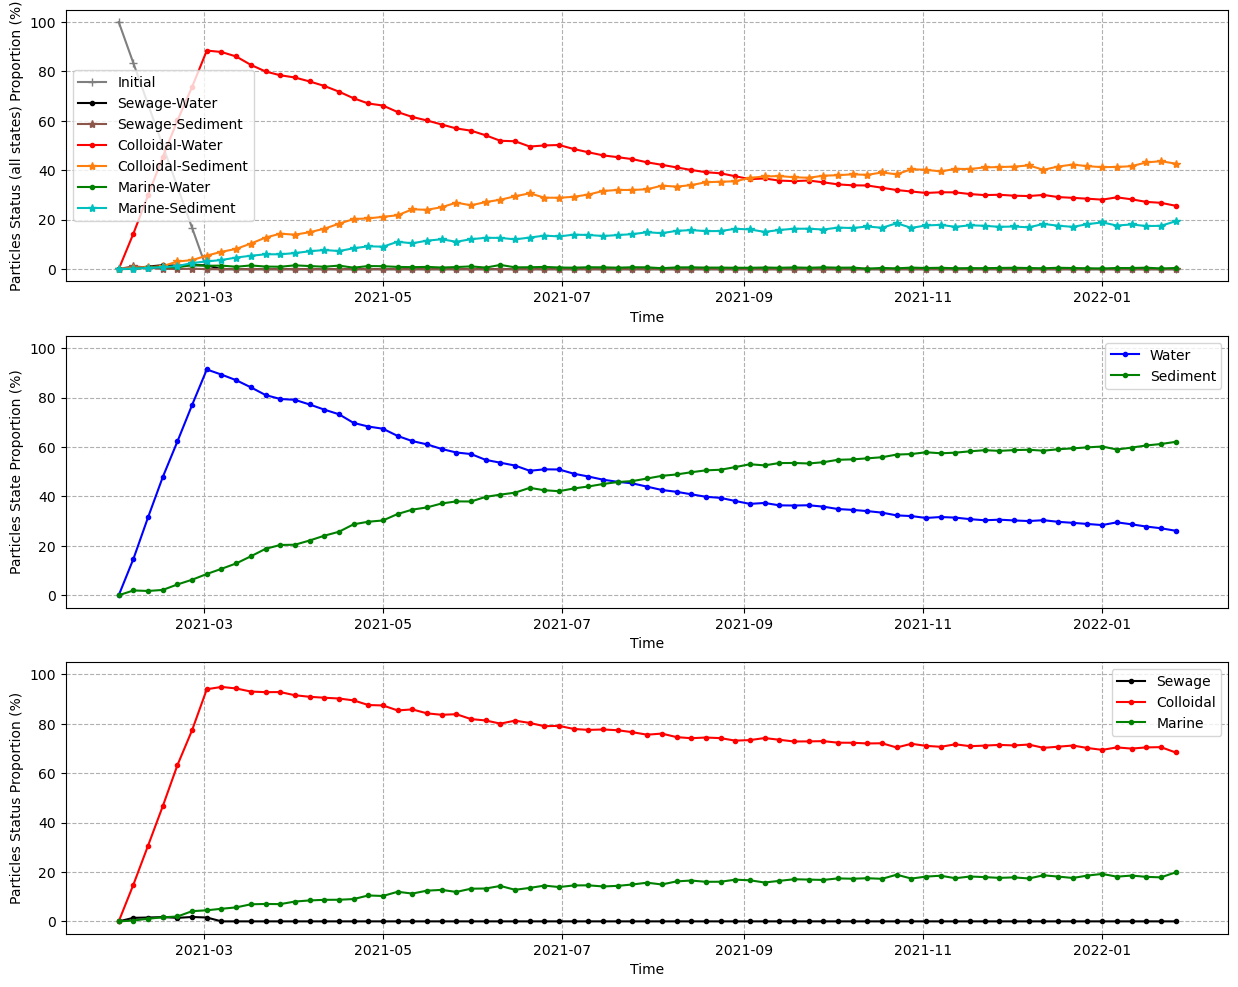

In [36]:
time_axis = data.time[0,:]
fig, ax = plt.subplots(3,1,figsize = (15,12))
# initial
ax[0].plot(time_axis, proportion_initial, '+-' ,c = 'tab:grey', label = 'Initial')
# Sewage particles in the water column
ax[0].plot(time_axis, proportion_sewage_water, '.-' ,c = 'k', label = 'Sewage-Water')
ax[0].plot(time_axis, proportion_sewage_sediment, '*-' , c = 'tab:brown', label = 'Sewage-Sediment')
#
#  Colloidal particles in the water column
ax[0].plot(time_axis, proportion_colloidal_water, '.-' ,c = 'r', label = 'Colloidal-Water')
ax[0].plot(time_axis, proportion_colloidal_sediment, '*-' , c = 'tab:orange', label = 'Colloidal-Sediment')
#
# Marine particles in the water column
ax[0].plot(time_axis, proportion_marine_water, '.-' ,c = 'g', label = 'Marine-Water')
ax[0].plot(time_axis, proportion_marine_sediment, '*-' , c = 'c', label = 'Marine-Sediment')
#
ax[0].legend()
ax[0].grid(linestyle = '--')
#
ax[0].set_ylabel('Particles Status (all states) Proportion (%)')
ax[0].set_xlabel('Time')
#
ax[0].set_ylim([-5,105])
###################################################
ax[1].plot(time_axis, proportion_water, '.-b', label = 'Water')
ax[1].plot(time_axis, proportion_sediment, '.-g', label = 'Sediment')
#
ax[1].legend()
ax[1].grid(linestyle = '--')
ax[1].set_ylabel('Particles State Proportion (%)')
ax[1].set_xlabel('Time')
ax[1].set_ylim([-5,105])
###################################################
ax[2].plot(time_axis, proportion_sewage, '.-k', label = 'Sewage')
ax[2].plot(time_axis, proportion_colloidal, '.-r', label = 'Colloidal')
ax[2].plot(time_axis, proportion_marine, '.-g' , label = 'Marine')
ax[2].legend()
ax[2].grid(linestyle = '--')
ax[2].set_ylabel('Particles Status Proportion (%)')
ax[2].set_xlabel('Time')
ax[2].set_ylim([-5,105])

Counts (number of particles)

2880


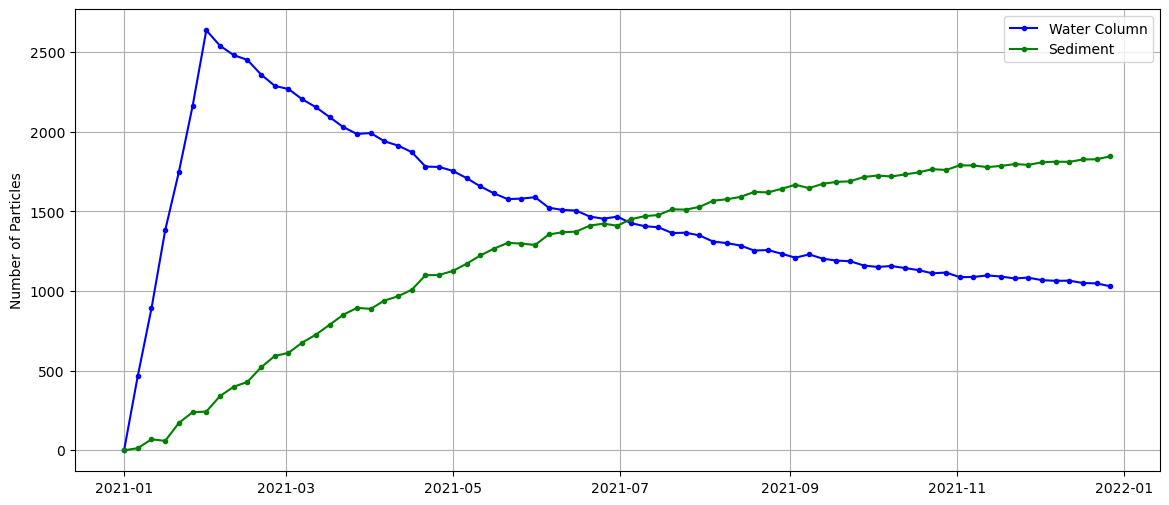

In [27]:
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(time_axis, np.count_nonzero((data.status < 10) & (data.status > 0), axis=0),'.-' ,c ='b', label = 'Water Column')
ax.plot(time_axis, np.count_nonzero((data.status < 20) & (data.status > 10), axis=0),'.-' ,c ='g', label = 'Sediment')
ax.legend()
ax.grid()
ax.set_ylabel('Number of Particles')
print(data.status.shape[0])

/tmp/ipykernel_2323340/1182615118.py:3: RuntimeWarning: invalid value encountered in divide
  ax.plot(time_axis,proportion_marine_sediment / proportion_colloidal_sediment, label='Sediment', c = 'g')
/tmp/ipykernel_2323340/1182615118.py:8: RuntimeWarning: invalid value encountered in divide
  axins.plot(time_axis, proportion_marine_water / proportion_colloidal_water, label='Water Column', c = 'b')


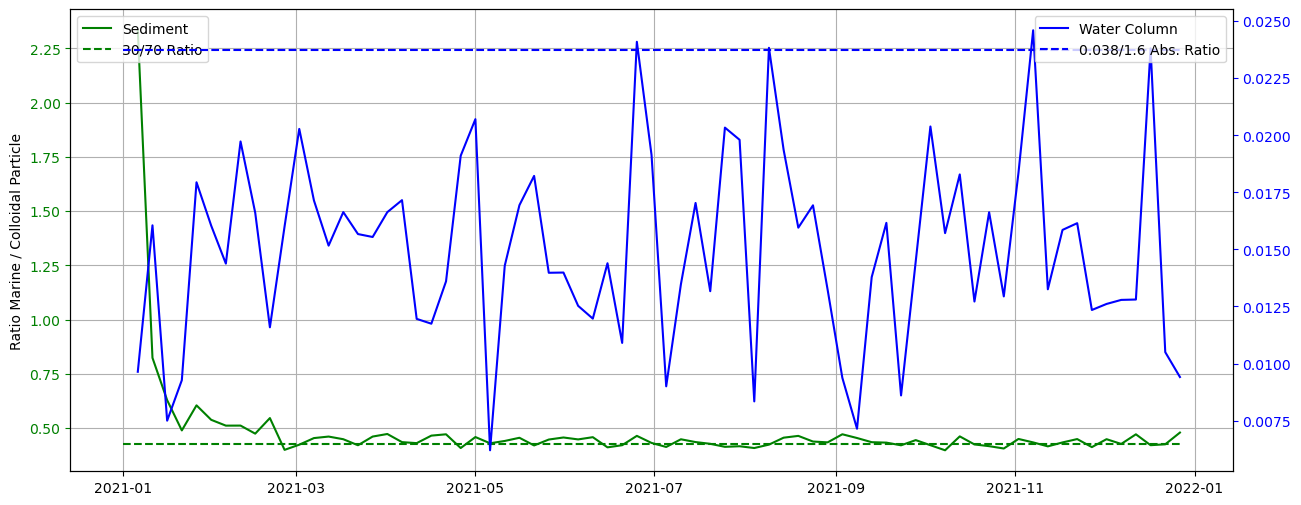

In [24]:
# Ratios in water column, sediment and buried
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(time_axis,proportion_marine_sediment / proportion_colloidal_sediment, label='Sediment', c = 'g')
ax.plot(data.time[0, :], 30/70. * np.ones_like(data.status[0, :]), '--', c='g', label = '30/70 Ratio')

#ax.plot(time_axis, proportion_marine_buried / proportion_colloidal_buried, label='Buried', c = 'tab:brown')
axins = ax.twinx()
axins.plot(time_axis, proportion_marine_water / proportion_colloidal_water, label='Water Column', c = 'b')
axins.plot(data.time[0, :], 0.038/1.6 * np.ones_like(data.status[0, :]), '--', c='b', label = '0.038/1.6 Abs. Ratio')
#
ax.tick_params(axis='y', colors='green')
axins.tick_params(axis='y', colors='blue')

#
ax.set_ylabel('Ratio Marine / Colloidal Particle')
ax.grid();
ax.legend(loc = 'upper left');
axins.legend(loc = 'upper right');

In [25]:
cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')
#
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

/tmp/ipykernel_2323340/1766203613.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


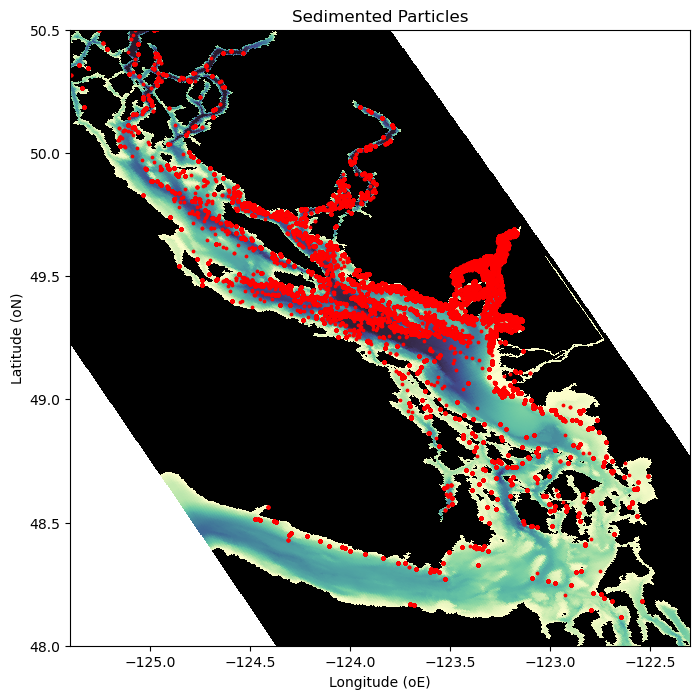

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
ax.set_xlim(-125.4, -122.3)
ax.set_ylim(48, 50.5);
#for ii in range(ntraj):
#    y = data.lat[ii]
#    x = data.lon[ii]
#    ax.plot(x, y, '.-', alpha=0.4);
#    if data.status[ii, -1] > 10:
#        ax.plot(data.lon[ii, -1], data.lat[ii, -1], 'ob', zorder=5);
#
ax.scatter(data.lon.where(data.status > 10), data.lat.where(data.status > 10), c ='r', s =3)
ax.set_title('Sedimented Particles');
ax.set_ylabel('Latitude (oN)')
ax.set_xlabel('Longitude (oE)');

Idea of latitude and longitude variance by distance from the source point!!

In [38]:
lat_source = 49.195045
lon_source = -123.301956

In [39]:
def spreading_over_time(filename, source_lon, source_lat, 
                                 tt_step=100, utm_epsg='EPSG:32610'):
    #
    from geopy.distance import geodesic
    from sklearn.decomposition import PCA
    from scipy.spatial import ConvexHull
    from pyproj import Transformer
    #
    data = xr.open_dataset(filename)
    lons = data.lon.values
    lats = data.lat.values
    time = data.time[0,:].values
    #
    results = []
    transformer = Transformer.from_crs("EPSG:4326", utm_epsg, always_xy=True)

    n_obs = lons.shape[1]

    for tt in range(0, n_obs, tt_step):
        lon_t = lons[:, tt]
        lat_t = lats[:, tt]

        # Remove NaNs
        valid = ~np.isnan(lon_t) & ~np.isnan(lat_t)
        if np.count_nonzero(valid) < 3:
            continue

        lon_t = lon_t[valid]
        lat_t = lat_t[valid]

        # Distance from source (in km)
        distances_km = np.array([
            geodesic((source_lat, source_lon), (lat, lon)).km
            for lat, lon in zip(lat_t, lon_t)
        ])
        mean_dist = np.mean(distances_km)
        std_dist = np.std(distances_km)

        # Project to meters first, then convert to km
        x_m, y_m = transformer.transform(lon_t, lat_t)
        x_km = np.array(x_m) / 1000
        y_km = np.array(y_m) / 1000

        var_x = np.var(x_km)
        var_y = np.var(y_km)

        coords = np.stack([x_km, y_km], axis=1)

        # Convex hull (area in km²)
        try:
            hull = ConvexHull(coords)
            hull_area = hull.volume  # volume in 2D = area
        except Exception:
            hull_area = np.nan

        results.append({
            'time': time[tt],
            'mean_distance_km': mean_dist,
            'std_distance_km': std_dist,
            'var_x_km2': var_x,
            'var_y_km2': var_y,
            'convex_hull_area_km2': hull_area
        })

    df = pd.DataFrame(results).set_index('time')
    return df



In [42]:
run_jan = spreading_over_time(filename=susan_runs[0],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_feb = spreading_over_time(filename=susan_runs[1],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_mar = spreading_over_time(filename=susan_runs[2],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_apr = spreading_over_time(filename=susan_runs[3],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_may = spreading_over_time(filename=susan_runs[4],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_jun = spreading_over_time(filename=susan_runs[5],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_jul = spreading_over_time(filename=susan_runs[6],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_aug = spreading_over_time(filename=susan_runs[7],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_sep = spreading_over_time(filename=susan_runs[8],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_oct = spreading_over_time(filename=susan_runs[9],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_nov = spreading_over_time(filename=susan_runs[10],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_dec = spreading_over_time(filename=susan_runs[11],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
########### store them #########
month_runs = [run_jan, run_feb, run_mar, run_apr, run_may, run_jun, run_jul, run_aug,
              run_sep, run_oct, run_nov, run_dec]

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warni

In [43]:
label_months = ['run_JAN', 'run_FEB', 'run_MAR', 'run_APR', 'run_MAY', 'run_JUN', 'run_JUL', 'run_AUG',
              'run_SEP', 'run_OCT', 'run_NOV', 'run_DEC']

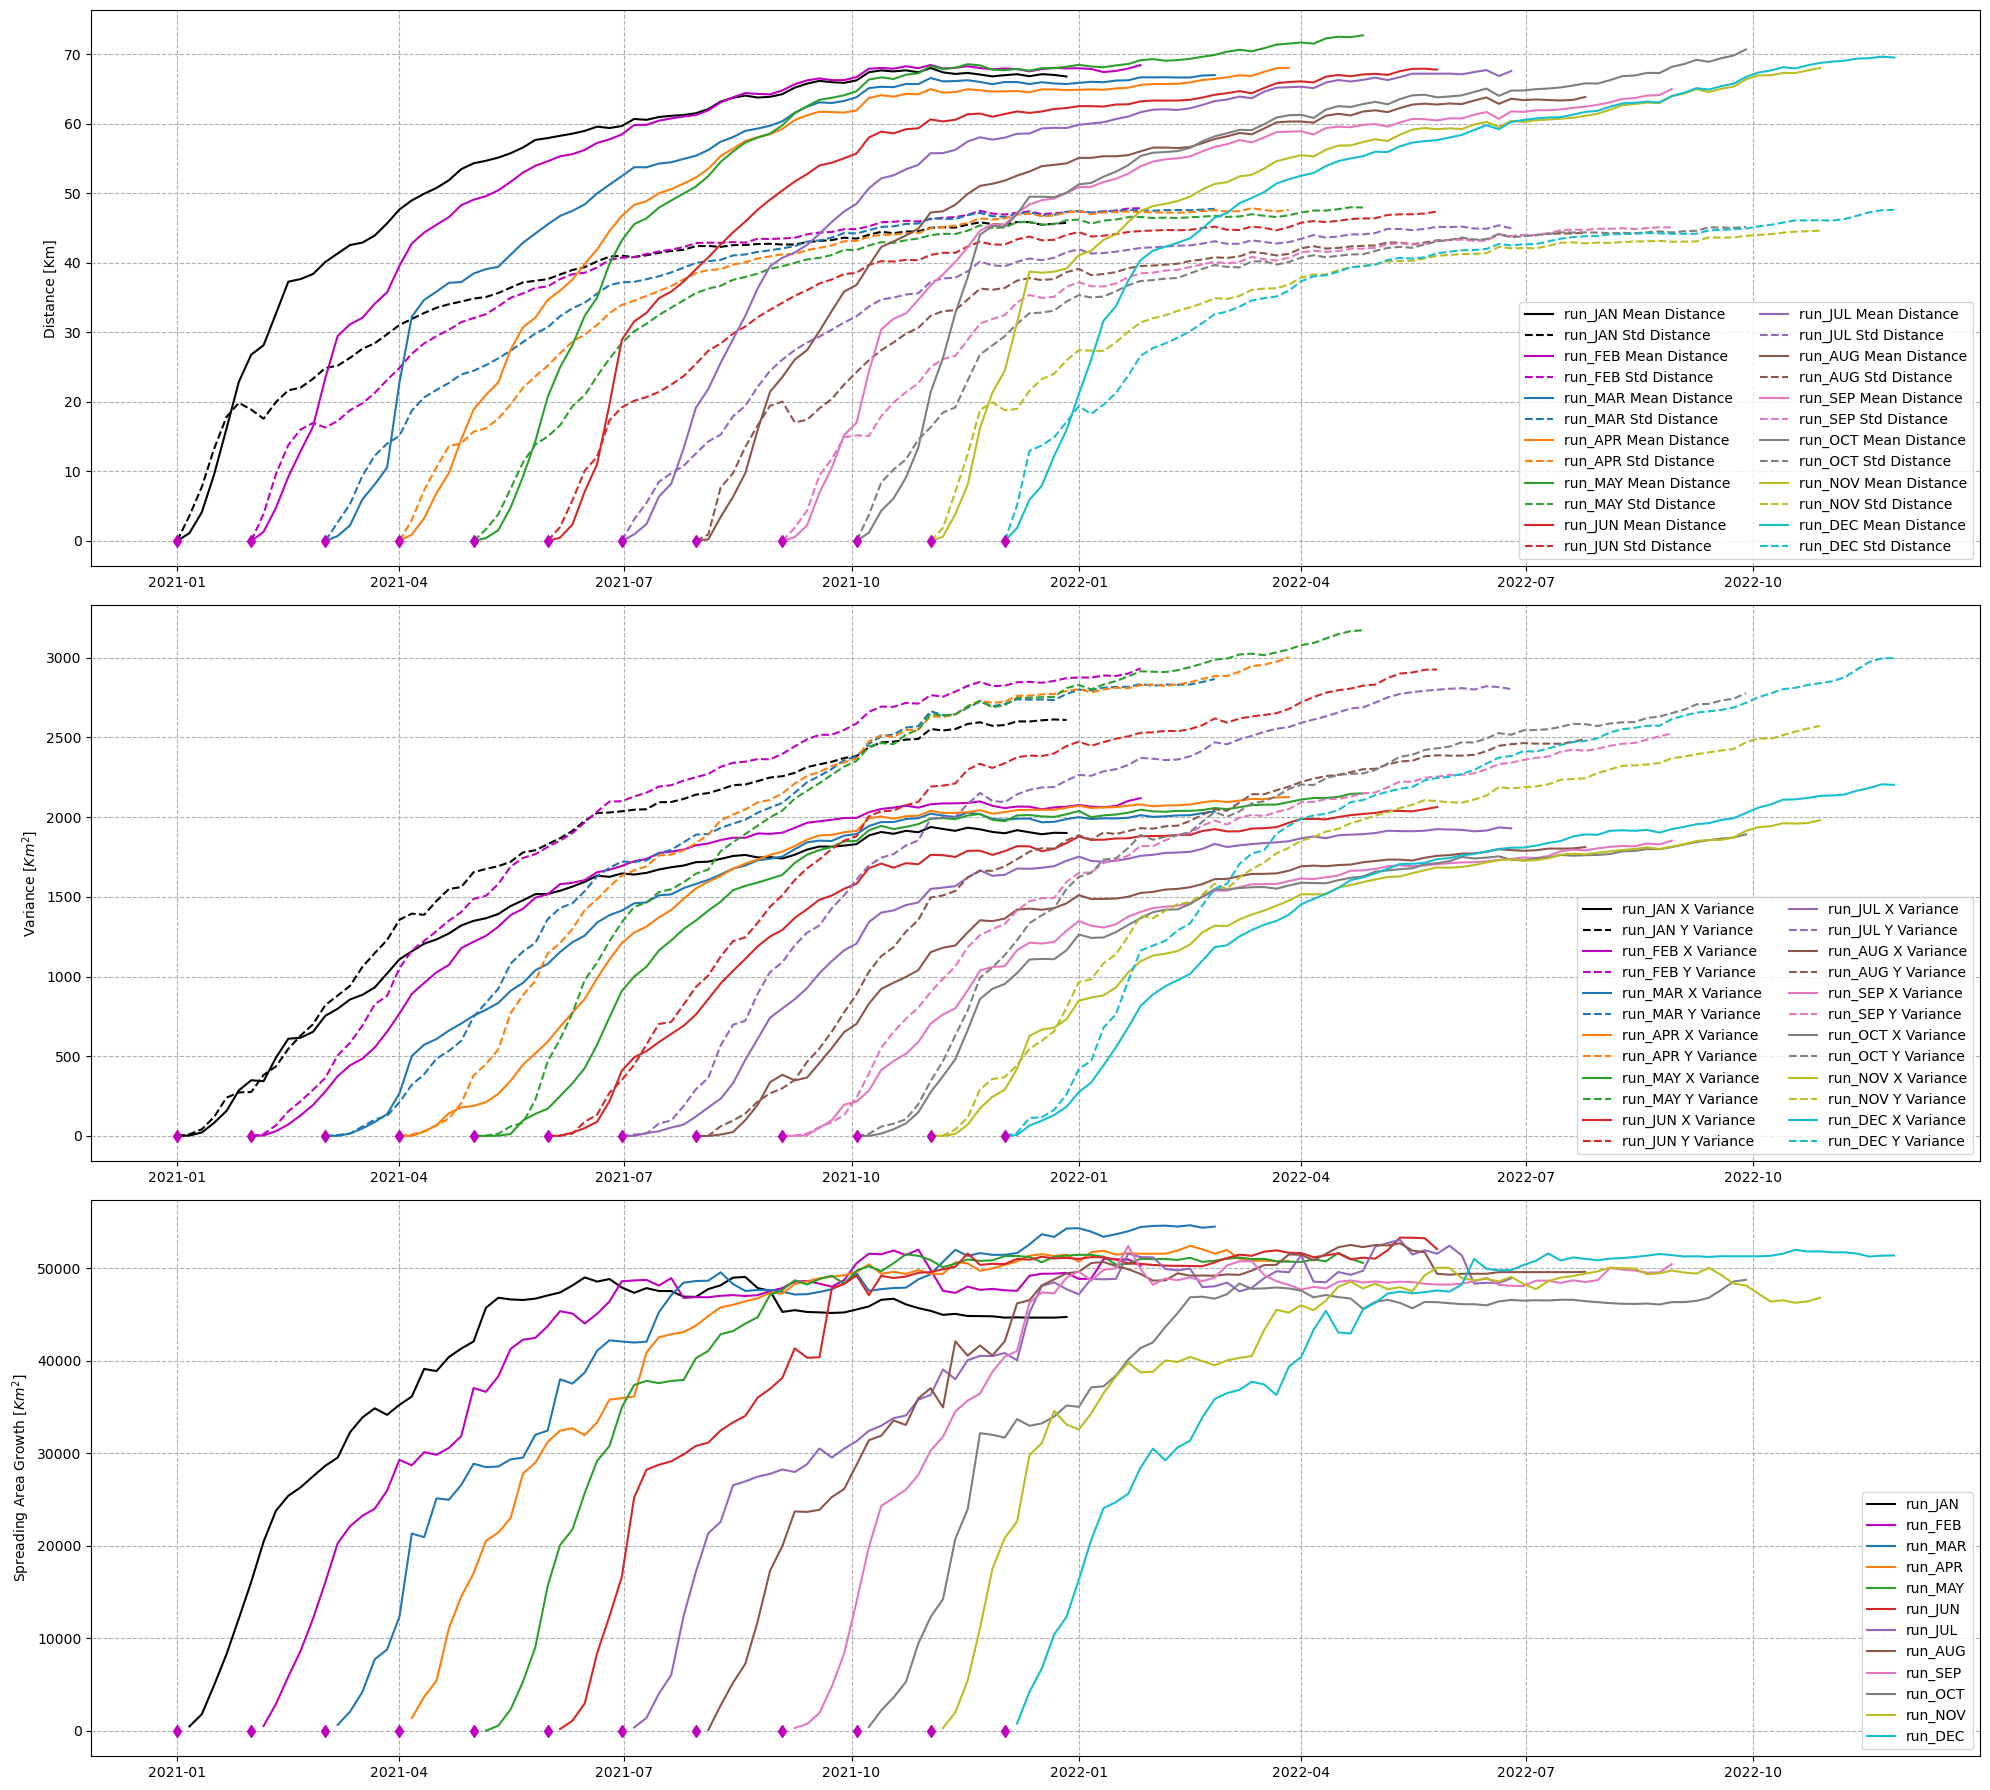

In [46]:
fig, ax = plt.subplots(3,1,figsize = (20, 18))
#
c = ['k', 'm','tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
#
for n in range(0,len(month_runs)):
    ax[0].plot(month_runs[n]['mean_distance_km'], '-', color = c[n], label = label_months[n] + ' Mean Distance')
    #
    ax[0].plot(month_runs[n]['std_distance_km'], '--',  color = c[n], label = label_months[n] + ' Std Distance')
    ax[0].set_ylabel('Distance [Km]')
    ax[0].legend(ncol=2, loc = 'lower right')
    ax[0].grid(linestyle = '--')
    #
    ax[1].plot(month_runs[n]['var_x_km2'], '-', color = c[n], label = label_months[n] + ' X Variance')
    ax[1].plot(month_runs[n]['var_y_km2'], '--', color = c[n], label = label_months[n] + ' Y Variance')
    ax[1].set_ylabel(r'Variance [$Km^{2}$]')
    ax[1].legend(ncol=2, loc = 'lower right')
    ax[1].grid(linestyle = '--')
    #
    ax[2].plot(month_runs[n]['convex_hull_area_km2'], color = c[n],  label = label_months[n])
    ax[2].set_ylabel(r'Spreading Area Growth [$Km^{2}$]')
    ax[2].legend(loc = 'lower right')
    ax[2].grid(linestyle = '--')
    #
    ax[0].plot(month_runs[n].index[0], 0, 'dm')
    ax[1].plot(month_runs[n].index[0], 0, 'dm')
    ax[2].plot(month_runs[n].index[0], 0, 'dm')
plt.tight_layout()

Now for the sediment

In [47]:
def spreading_over_time_by_status(
    filename, source_lon, source_lat,
    tt_step=100, utm_epsg='EPSG:32610'
):
    from geopy.distance import geodesic
    from scipy.spatial import ConvexHull
    from pyproj import Transformer
#
    data = xr.open_dataset(filename)
    lons = data.lon.values
    lats = data.lat.values
    status = data.status.values
    time = data.time[0, :].values

    results_water = []
    results_sediment = []

    transformer = Transformer.from_crs("EPSG:4326", utm_epsg, always_xy=True)
    n_obs = lons.shape[1]

    for tt in range(0, n_obs, tt_step):
        for label, results_list, valid_status in [
            ("water", results_water, [1, 2, 3]),
            ("sediment", results_sediment, [11, 12, 13])
        ]:
            lon_t = lons[:, tt]
            lat_t = lats[:, tt]
            status_t = status[:, tt]

            valid = (
                ~np.isnan(lon_t) & 
                ~np.isnan(lat_t) & 
                np.isin(status_t, valid_status)
            )
            if np.count_nonzero(valid) < 3:
                continue

            lon_t = lon_t[valid]
            lat_t = lat_t[valid]

            # Compute distance from source (in km)
            distances_km = np.array([
                geodesic((source_lat, source_lon), (lat, lon)).km
                for lat, lon in zip(lat_t, lon_t)
            ])
            mean_dist = np.mean(distances_km)
            std_dist = np.std(distances_km)

            # Project to UTM (convert to km)
            x_m, y_m = transformer.transform(lon_t, lat_t)
            x_km = np.array(x_m) / 1000
            y_km = np.array(y_m) / 1000

            var_x = np.var(x_km)
            var_y = np.var(y_km)

            coords = np.stack([x_km, y_km], axis=1)

            try:
                hull = ConvexHull(coords)
                hull_area = hull.volume  # volume in 2D = area
            except Exception:
                hull_area = np.nan

            results_list.append({
                'time': time[tt],
                'mean_distance_km': mean_dist,
                'std_distance_km': std_dist,
                'var_x_km2': var_x,
                'var_y_km2': var_y,
                'convex_hull_area_km2': hull_area
            })

    df_water = pd.DataFrame(results_water).set_index('time')
    df_sediment = pd.DataFrame(results_sediment).set_index('time')
    return df_water, df_sediment


In [48]:
run_jan_water, run_jan_sediment = spreading_over_time_by_status(filename=susan_runs[0],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_feb_water, run_feb_sediment = spreading_over_time_by_status(filename=susan_runs[1],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_mar_water, run_mar_sediment = spreading_over_time_by_status(filename=susan_runs[2],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_apr_water, run_apr_sediment = spreading_over_time_by_status(filename=susan_runs[3],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_may_water, run_may_sediment = spreading_over_time_by_status(filename=susan_runs[4],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_jun_water, run_jun_sediment = spreading_over_time_by_status(filename=susan_runs[5],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_jul_water, run_jul_sediment = spreading_over_time_by_status(filename=susan_runs[6],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_aug_water, run_aug_sediment = spreading_over_time_by_status(filename=susan_runs[7],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_sep_water, run_sep_sediment = spreading_over_time_by_status(filename=susan_runs[8],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_oct_water, run_oct_sediment = spreading_over_time_by_status(filename=susan_runs[9],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_nov_water, run_nov_sediment = spreading_over_time_by_status(filename=susan_runs[10],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
#
run_dec_water, run_dec_sediment = spreading_over_time_by_status(filename=susan_runs[11],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=1)
########### store them #########
month_runs_water = [run_jan_water, run_feb_water, run_mar_water, run_apr_water, run_may_water
                    , run_jun_water, run_jul_water, run_aug_water, run_sep_water, run_oct_water, run_nov_water, run_dec_water]
month_runs_sediment = [run_jan_sediment, run_feb_sediment, run_mar_sediment, run_apr_sediment, run_may_sediment
                    , run_jun_sediment, run_jul_sediment, run_aug_sediment, run_sep_sediment, run_oct_sediment
                    , run_nov_sediment, run_dec_sediment]

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warni

Just In the water column

Text(0.5, 0.98, 'In the Water')

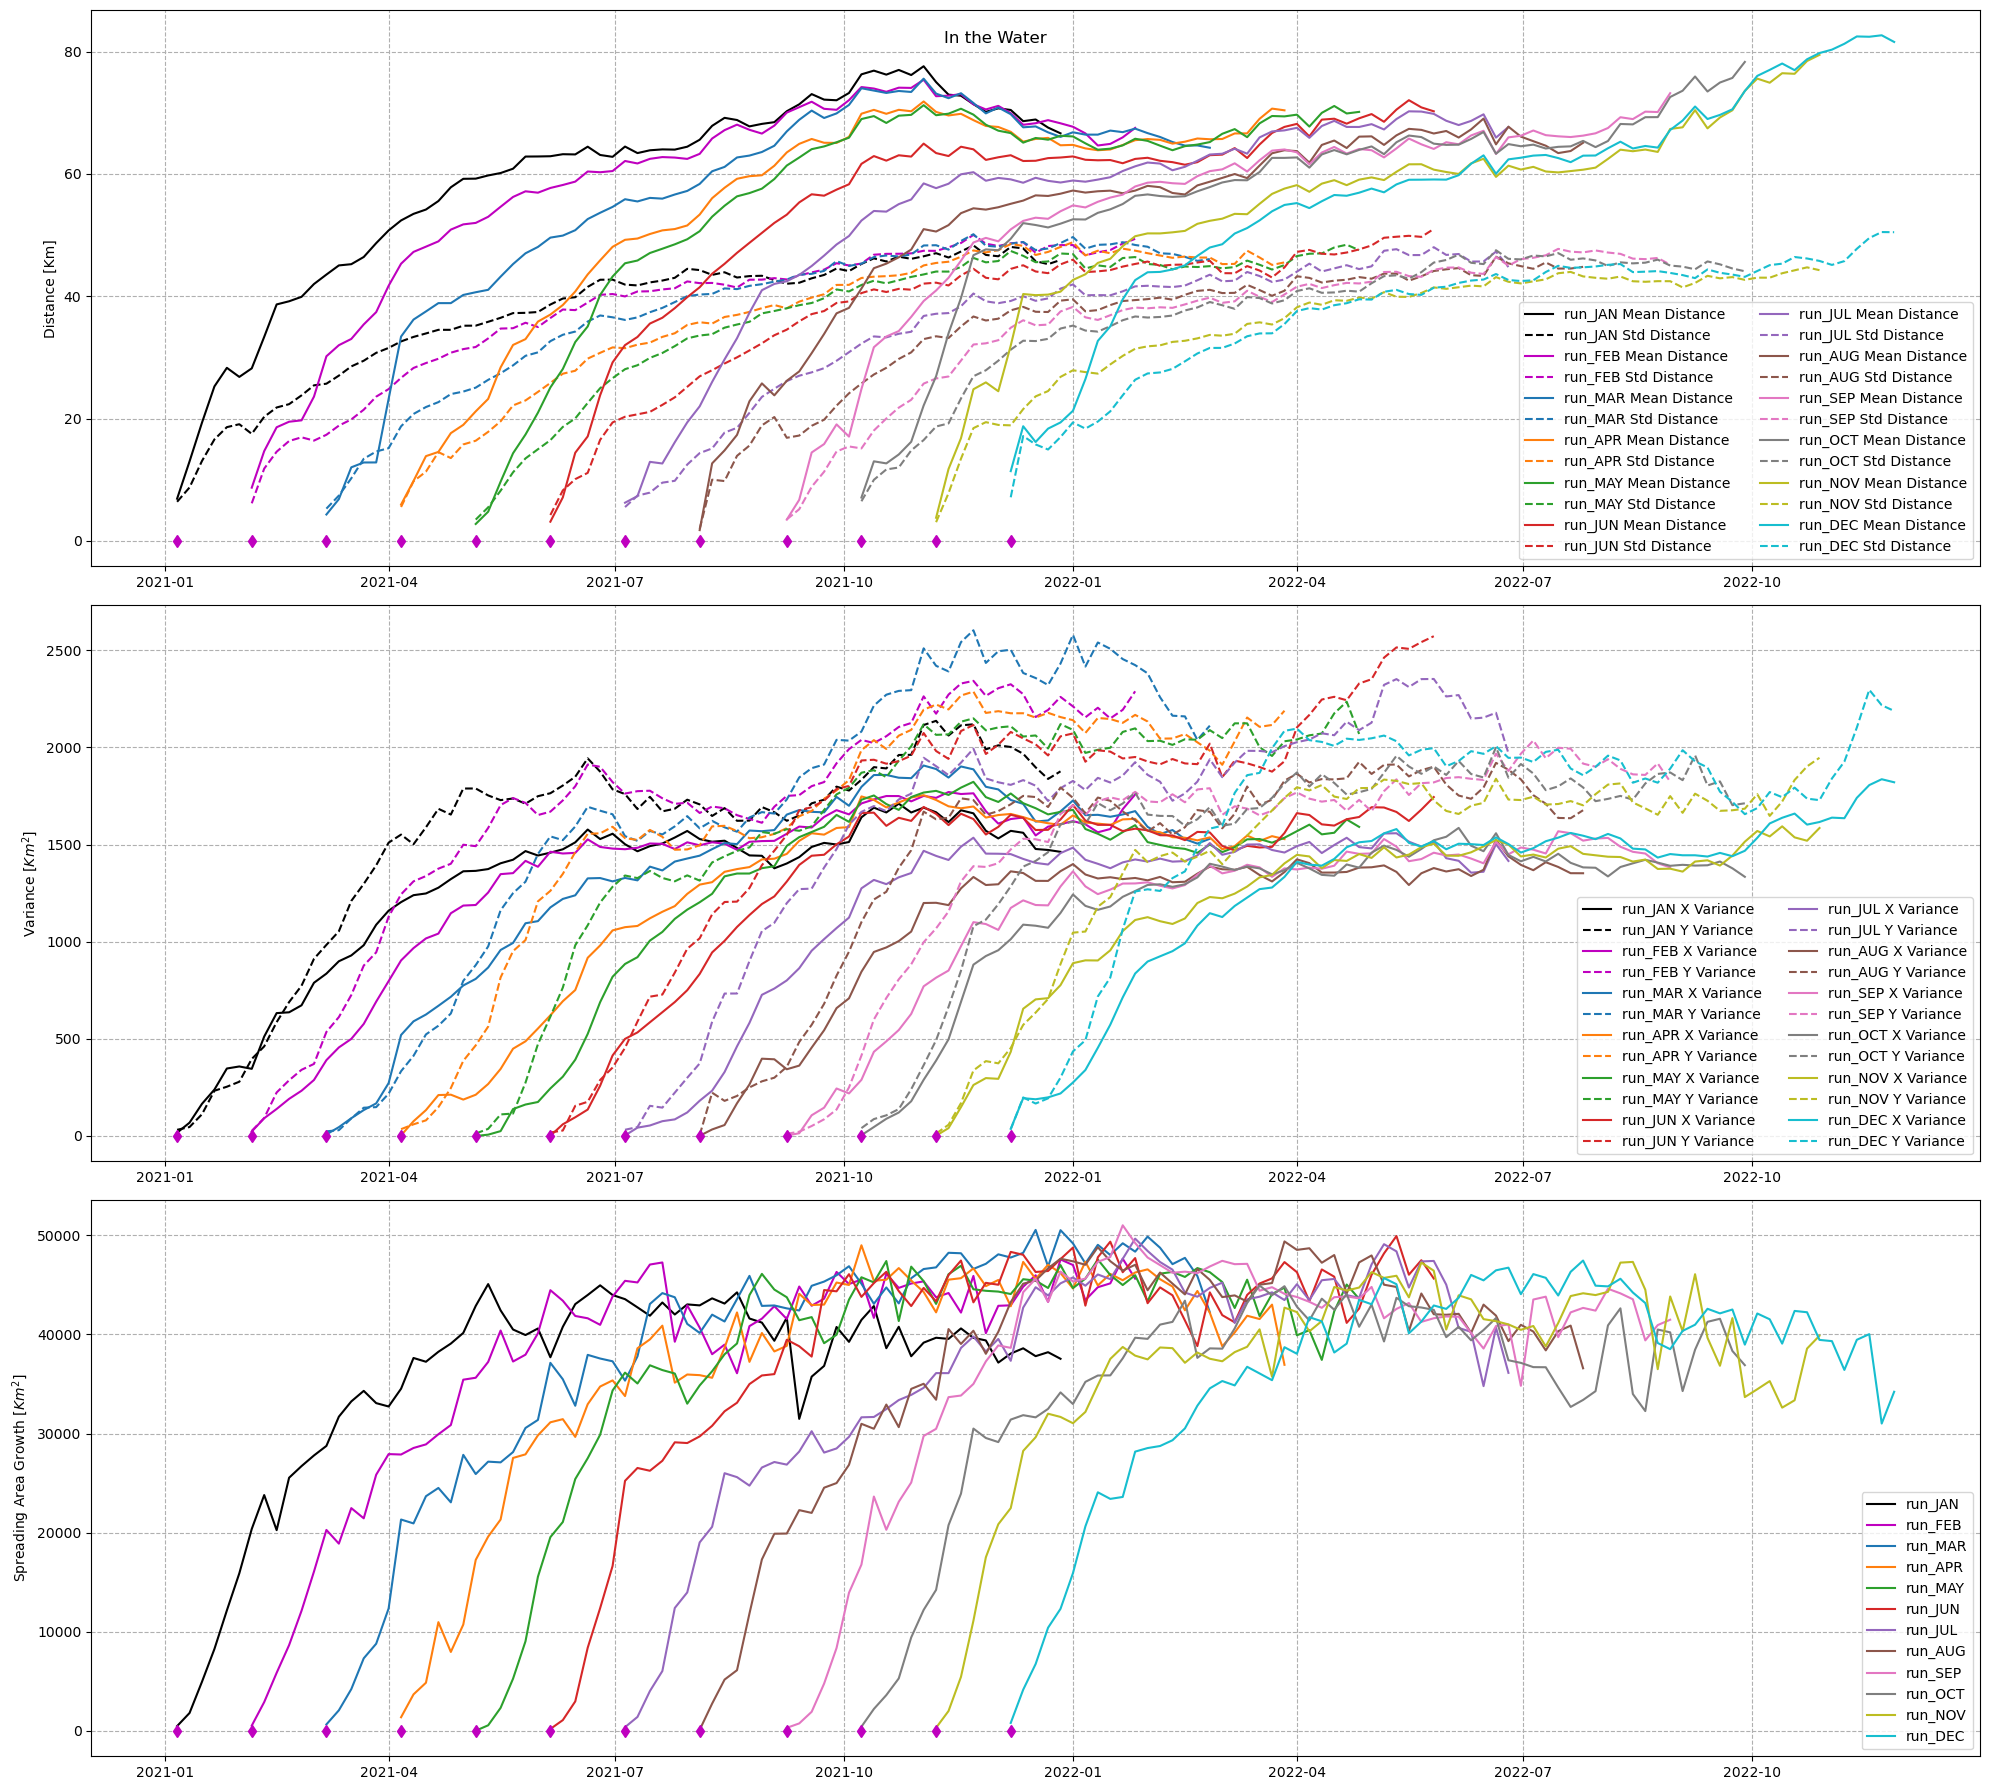

In [49]:
fig, ax = plt.subplots(3,1,figsize = (20, 18))
#
c = ['k', 'm','tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
#
for n in range(0,len(month_runs_water)):
    ax[0].plot(month_runs_water[n]['mean_distance_km'], '-', color = c[n], label = label_months[n] + ' Mean Distance')
    #
    ax[0].plot(month_runs_water[n]['std_distance_km'], '--',  color = c[n], label = label_months[n] + ' Std Distance')
    ax[0].set_ylabel('Distance [Km]')
    ax[0].legend(ncol=2, loc = 'lower right')
    ax[0].grid(linestyle = '--')
    #
    ax[1].plot(month_runs_water[n]['var_x_km2'], '-', color = c[n], label = label_months[n] + ' X Variance')
    ax[1].plot(month_runs_water[n]['var_y_km2'], '--', color = c[n], label = label_months[n] + ' Y Variance')
    ax[1].set_ylabel(r'Variance [$Km^{2}$]')
    ax[1].legend(ncol=2, loc = 'lower right')
    ax[1].grid(linestyle = '--')
    #
    ax[2].plot(month_runs_water[n]['convex_hull_area_km2'], color = c[n],  label = label_months[n])
    ax[2].set_ylabel(r'Spreading Area Growth [$Km^{2}$]')
    ax[2].legend(loc = 'lower right')
    ax[2].grid(linestyle = '--')
    #
    ax[0].plot(month_runs_water[n].index[0], 0, 'dm')
    ax[1].plot(month_runs_water[n].index[0], 0, 'dm')
    ax[2].plot(month_runs_water[n].index[0], 0, 'dm')
plt.tight_layout()
plt.suptitle('In the Water')    


Now just in the sediment

Text(0.5, 0.98, 'In the Sediment')

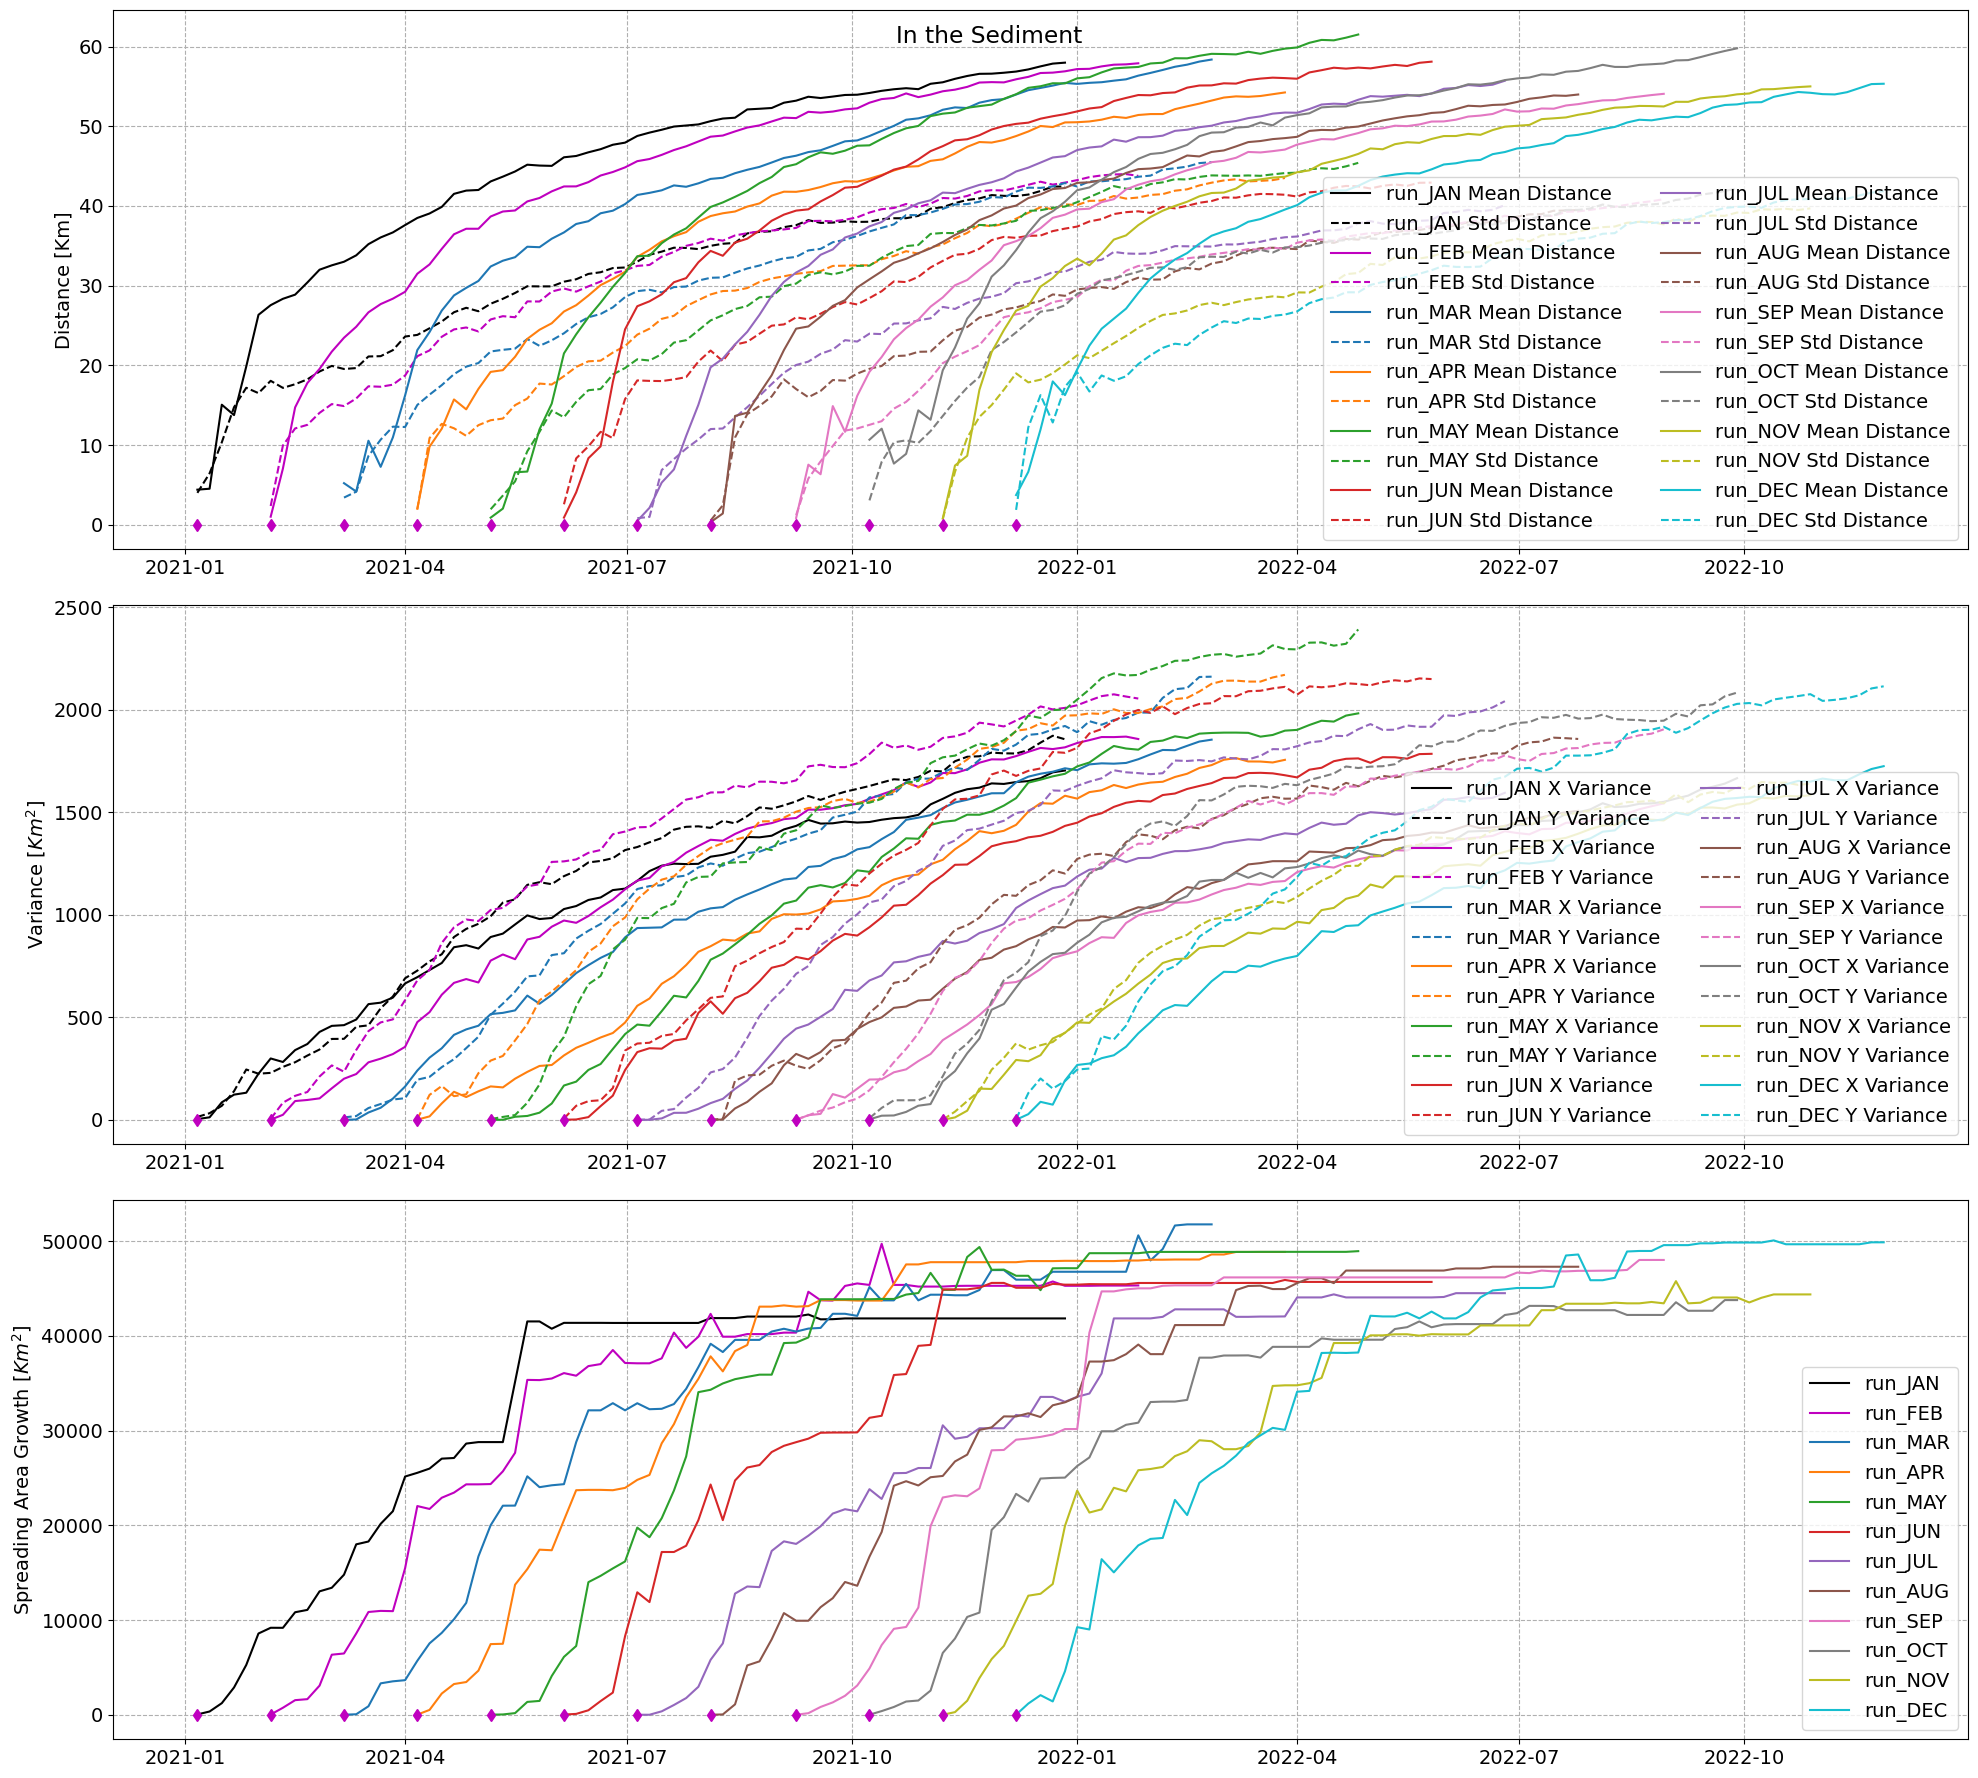

In [95]:
fig, ax = plt.subplots(3,1,figsize = (20, 18))
#
c = ['k', 'm','tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
#
for n in range(0,len(month_runs_sediment)):
    ax[0].plot(month_runs_sediment[n]['mean_distance_km'], '-', color = c[n], label = label_months[n] + ' Mean Distance')
    #
    ax[0].plot(month_runs_sediment[n]['std_distance_km'], '--',  color = c[n], label = label_months[n] + ' Std Distance')
    ax[0].set_ylabel('Distance [Km]')
    ax[0].legend(ncol=2, loc = 'lower right')
    ax[0].grid(linestyle = '--')
    #
    ax[1].plot(month_runs_sediment[n]['var_x_km2'], '-', color = c[n], label = label_months[n] + ' X Variance')
    ax[1].plot(month_runs_sediment[n]['var_y_km2'], '--', color = c[n], label = label_months[n] + ' Y Variance')
    ax[1].set_ylabel(r'Variance [$Km^{2}$]')
    ax[1].legend(ncol=2, loc = 'lower right')
    ax[1].grid(linestyle = '--')
    #
    ax[2].plot(month_runs_sediment[n]['convex_hull_area_km2'], color = c[n],  label = label_months[n])
    ax[2].set_ylabel(r'Spreading Area Growth [$Km^{2}$]')
    ax[2].legend(loc = 'lower right')
    ax[2].grid(linestyle = '--')
    #
    ax[0].plot(month_runs_sediment[n].index[0], 0, 'dm')
    ax[1].plot(month_runs_sediment[n].index[0], 0, 'dm')
    ax[2].plot(month_runs_sediment[n].index[0], 0, 'dm')
plt.tight_layout()
plt.suptitle('In the Sediment') 

Check the last value of each

In [81]:
area_last_monthly = np.zeros(len(month_runs))
area_last_monthly_water = np.zeros(len(month_runs_water))
area_last_monthly_sediment = np.zeros(len(month_runs_sediment))
#
Y_var_last_monthly = np.zeros(len(month_runs))
Y_var_last_monthly_water = np.zeros(len(month_runs_water))
Y_var_last_monthly_sediment = np.zeros(len(month_runs_sediment))
#
X_var_last_monthly = np.zeros(len(month_runs))
X_var_last_monthly_water = np.zeros(len(month_runs_water))
X_var_last_monthly_sediment = np.zeros(len(month_runs_sediment))
#
mean_dist_last_monthly = np.zeros(len(month_runs))
mean_dist_last_monthly_water = np.zeros(len(month_runs_water))
mean_dist_last_monthly_sediment = np.zeros(len(month_runs_sediment))
#
std_dist_last_monthly = np.zeros(len(month_runs))
std_dist_last_monthly_water = np.zeros(len(month_runs_water))
std_dist_last_monthly_sediment = np.zeros(len(month_runs_sediment))
#
for i in range(len(area_last_monthly)):
    #
    area_last_monthly[i] = month_runs[i]['convex_hull_area_km2'].values[-1]
    area_last_monthly_water[i] = month_runs_water[i]['convex_hull_area_km2'].values[-1]
    area_last_monthly_sediment[i] = month_runs_sediment[i]['convex_hull_area_km2'].values[-1] 
    #
    Y_var_last_monthly[i] = month_runs[i]['var_y_km2'].values[-1]
    Y_var_last_monthly_water[i] = month_runs_water[i]['var_y_km2'].values[-1]
    Y_var_last_monthly_sediment[i] = month_runs_sediment[i]['var_y_km2'].values[-1] 
    #  
    X_var_last_monthly[i] = month_runs[i]['var_x_km2'].values[-1]
    X_var_last_monthly_water[i] = month_runs_water[i]['var_x_km2'].values[-1]
    X_var_last_monthly_sediment[i] = month_runs_sediment[i]['var_x_km2'].values[-1]
    #
    mean_dist_last_monthly[i] = month_runs[i]['mean_distance_km'].values[-1]
    mean_dist_last_monthly_water[i] = month_runs_water[i]['mean_distance_km'].values[-1]
    mean_dist_last_monthly_sediment[i] = month_runs_sediment[i]['mean_distance_km'].values[-1]     
    #
    std_dist_last_monthly[i] = month_runs[i]['std_distance_km'].values[-1]
    std_dist_last_monthly_water[i] = month_runs_water[i]['std_distance_km'].values[-1]
    std_dist_last_monthly_sediment[i] = month_runs_sediment[i]['std_distance_km'].values[-1]            

Text(0.5, 0, 'Starting Date')

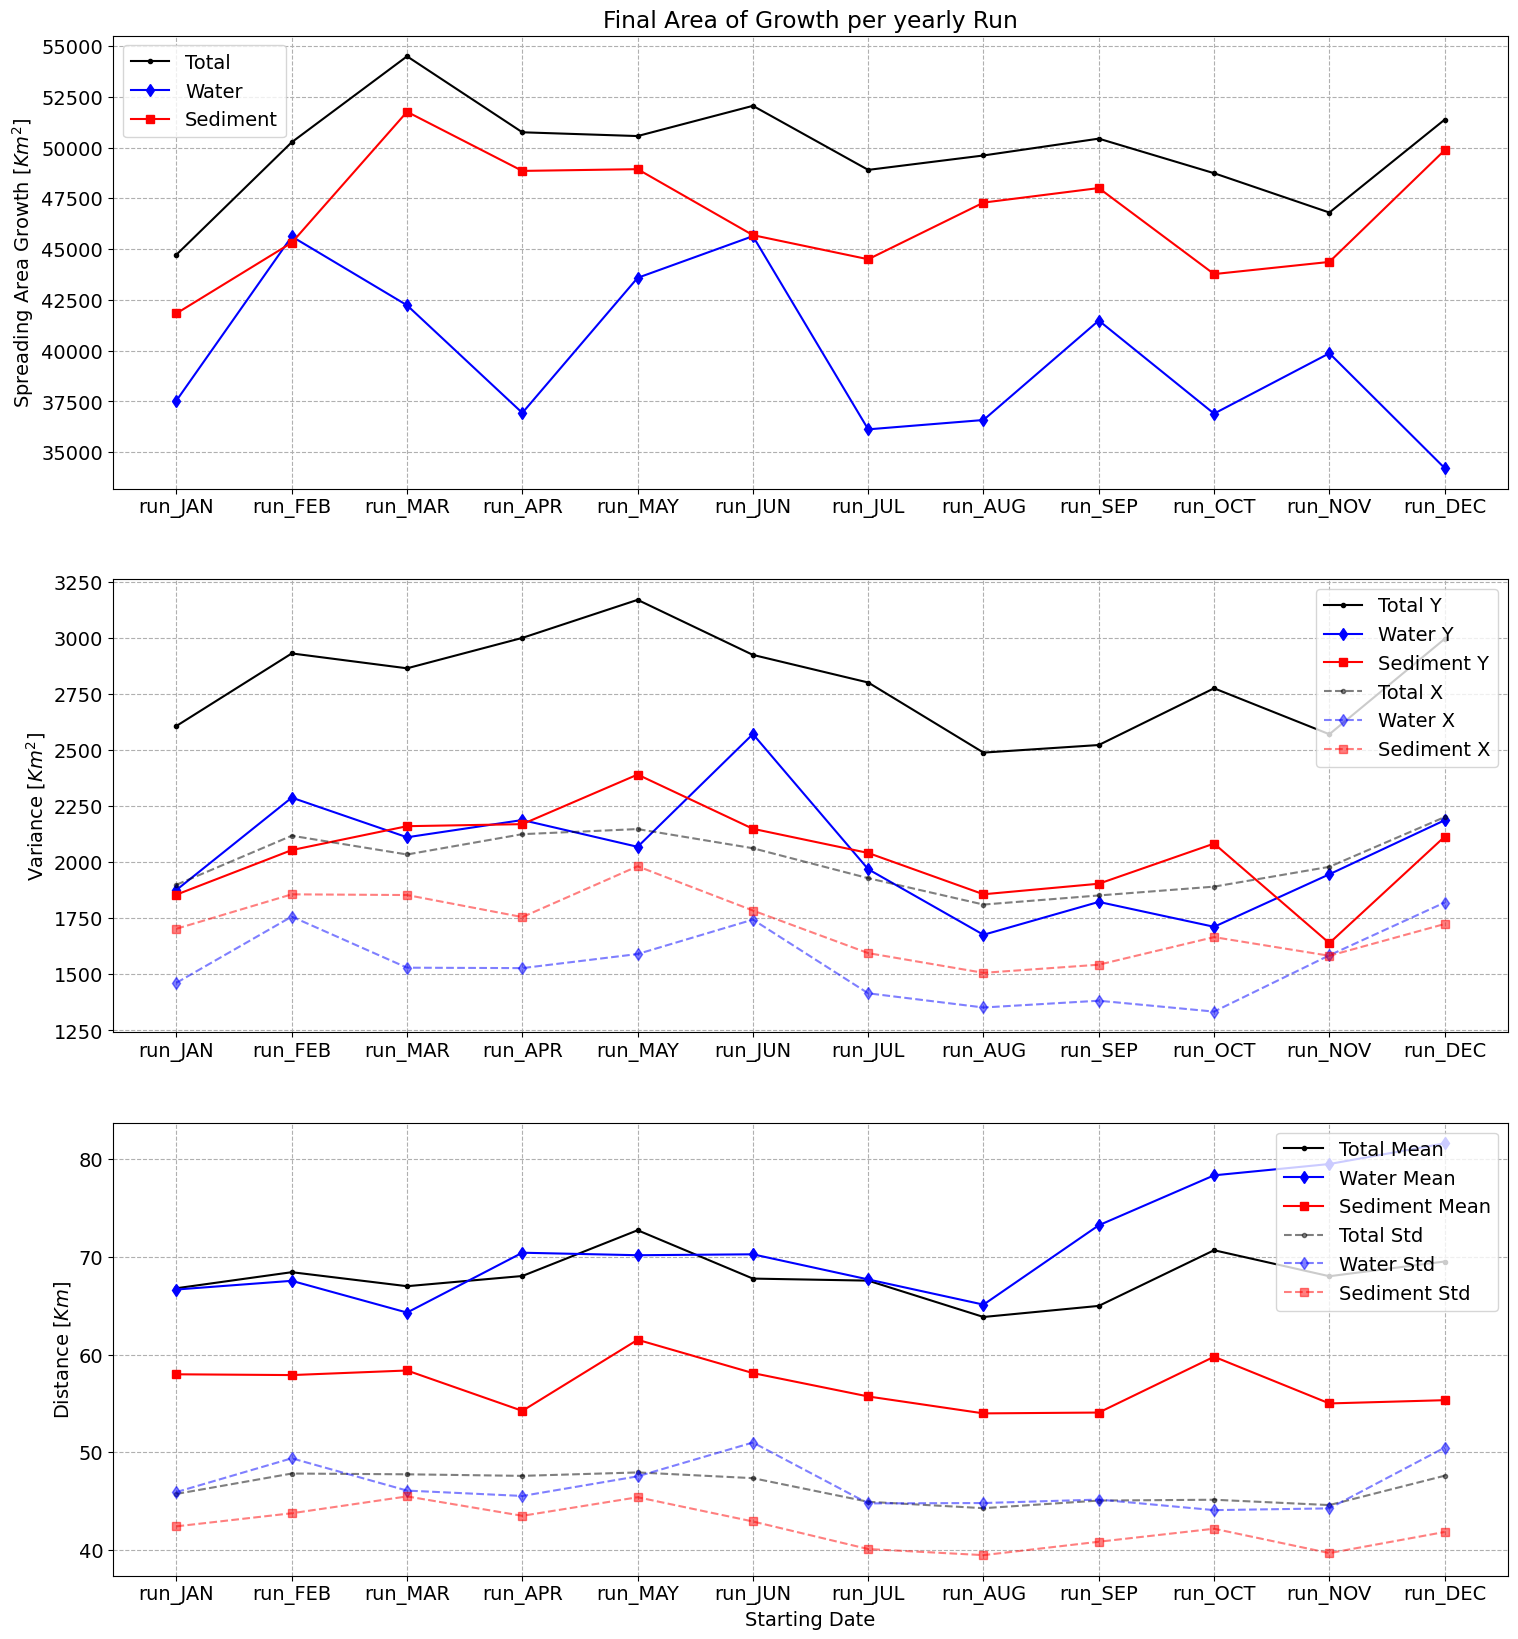

In [84]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(3, 1,figsize = (18, 20))
#
ax[0].plot(label_months, area_last_monthly, '.-k', label = 'Total')
ax[0].plot(label_months, area_last_monthly_water, 'd-b', label = 'Water')
ax[0].plot(label_months, area_last_monthly_sediment, 's-r', label = 'Sediment')
ax[0].set_ylabel(r'Spreading Area Growth [$Km^{2}$]')
ax[0].grid(linestyle = '--')
ax[0].legend()
ax[0].set_title('Final Area of Growth per yearly Run')
#
ax[1].plot(label_months, Y_var_last_monthly, '.-k', label = 'Total Y')
ax[1].plot(label_months, Y_var_last_monthly_water, 'd-b', label = 'Water Y')
ax[1].plot(label_months, Y_var_last_monthly_sediment, 's-r', label = 'Sediment Y')
#
ax[1].plot(label_months, X_var_last_monthly, '.--k', alpha = .5, label = 'Total X')
ax[1].plot(label_months, X_var_last_monthly_water, 'd--b', alpha = .5, label = 'Water X')
ax[1].plot(label_months, X_var_last_monthly_sediment, 's--r', alpha = .5, label = 'Sediment X')
#
ax[1].set_ylabel(r'Variance [$Km^{2}$]')
ax[1].grid(linestyle = '--')
ax[1].legend()
#
ax[2].plot(label_months, mean_dist_last_monthly, '.-k', label = 'Total Mean ')
ax[2].plot(label_months, mean_dist_last_monthly_water, 'd-b', label = 'Water Mean')
ax[2].plot(label_months, mean_dist_last_monthly_sediment, 's-r', label = 'Sediment Mean')
#
ax[2].plot(label_months, std_dist_last_monthly, '.--k', alpha = .5, label = 'Total Std')
ax[2].plot(label_months, std_dist_last_monthly_water, 'd--b', alpha = .5, label = 'Water Std')
ax[2].plot(label_months, std_dist_last_monthly_sediment, 's--r', alpha = .5, label = 'Sediment Std')
#
ax[2].set_ylabel(r'Distance [$Km$]')
ax[2].grid(linestyle = '--')
ax[2].legend()
ax[2].set_xlabel('Starting Date')

Spreading patterns (2D)

In [103]:
data_runs = []
#
for i in range(0,len(susan_runs)):
    data_runs.append(xr.open_dataset(susan_runs[i]))

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warni

/tmp/ipykernel_2323340/886767181.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


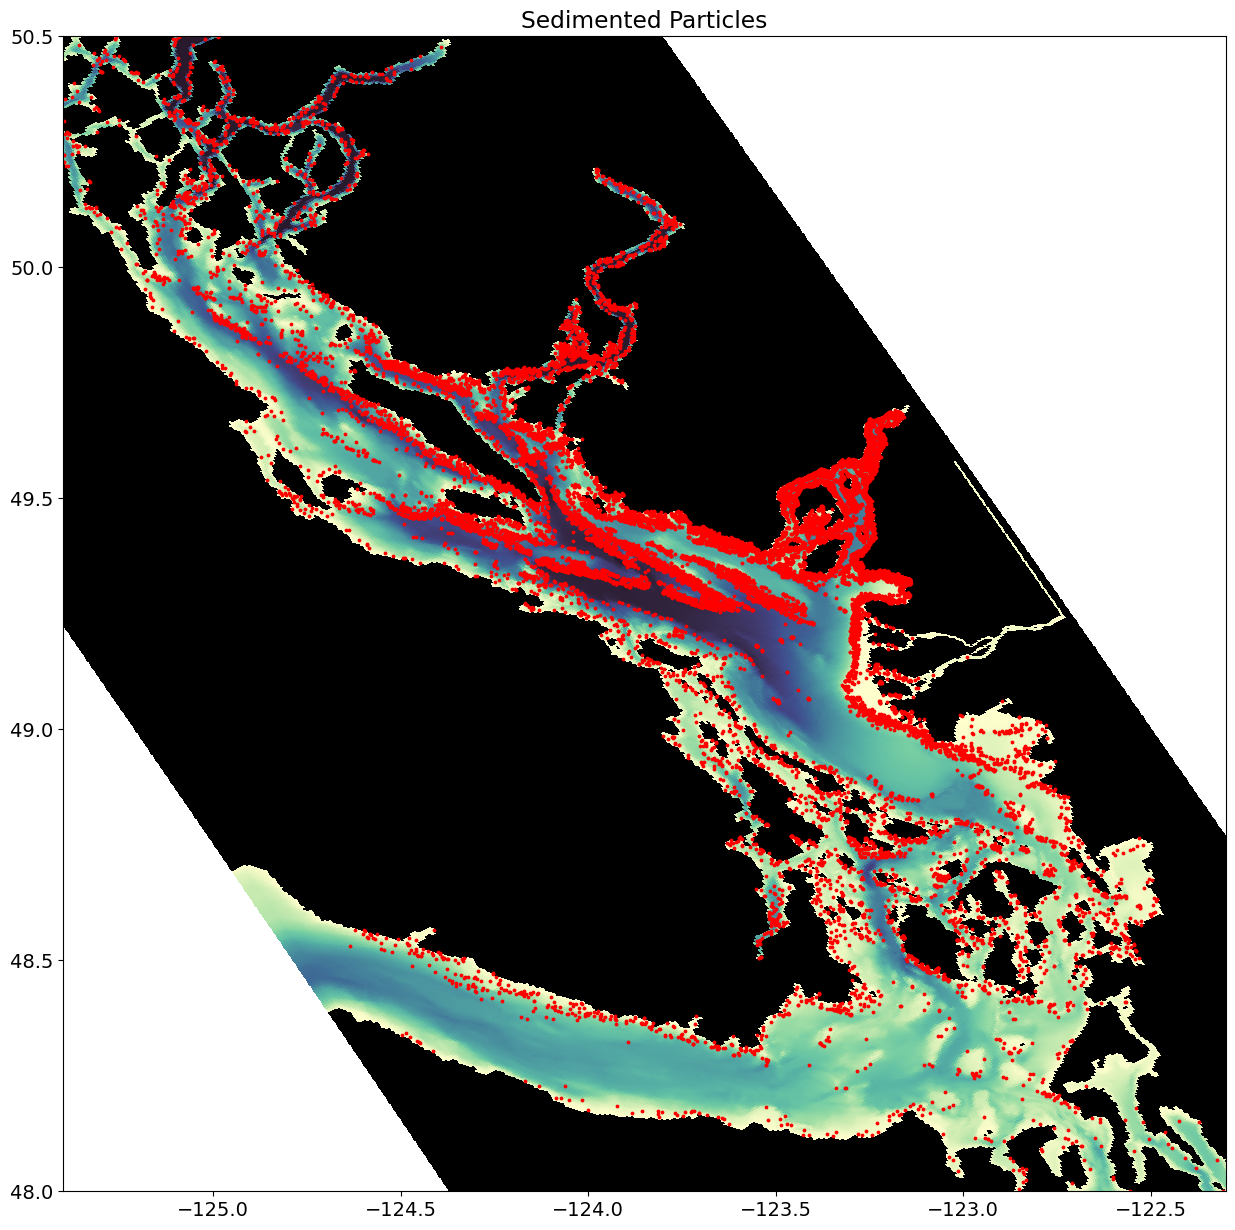

In [110]:
fig, ax = plt.subplots(figsize = (15,15))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
ax.set_xlim(-125.4, -122.3)
ax.set_ylim(48, 50.5);
ax.set_title('Sedimented Particles')
for n in range(0, len(data_runs)):
    ax.scatter(data_runs[n].lon[:,-1].where(data_runs[n].status[:,-1] > 10), data_runs[n].lat[:,-1].where(data_runs[n].status[:,-1] > 10), c = 'r', s =3)